# Excercise 1

### Load data


In [118]:
import numpy as np
    
data1 = np.genfromtxt('ex1data1.txt', delimiter=',')

print(data1[1:5])

[[ 5.5277  9.1302]
 [ 8.5186 13.662 ]
 [ 7.0032 11.854 ]
 [ 5.8598  6.8233]]


### Split data into X and y

In [119]:
X = data1[:,0]
print('X = ', X[1:5], '...')

y = data1[:,1]
print("y = ", y[1:5], '...')

m = len(y)
print('There are ', m, ' training examples.')

X =  [5.5277 8.5186 7.0032 5.8598] ...
y =  [ 9.1302 13.662  11.854   6.8233] ...
There are  97  training examples.


### Plot the data

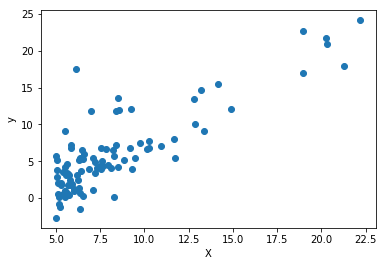

In [120]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

fig, ax = plt.subplots()
plt.scatter(X,y)

ax.set(xlabel='X', ylabel='y')

plt.show()

### Cost and Gradient Descent

In [121]:
# X needs a column of 1s:
X = np.c_[ np.ones(m), X ] 
print(X[1:5])

[[1.     5.5277]
 [1.     8.5186]
 [1.     7.0032]
 [1.     5.8598]]


In [149]:
# Set theta to 0
theta = np.array([0,0])

print(theta)

[0 0]


### Set parameters and def Cost Function J

In [150]:
def computeCost_J(X, y, theta):
    m = len(y)
    
    # Must use np.dot (dot-product in Python
    prediction = np.dot(X, theta) 
    sqErr = (prediction - y)**2
    J = 1/(2*m) * np.sum(sqErr)
    
    return(J)
    

In [151]:
J = computeCost_J(X,y, theta)
print("cost for theta ", theta, " is J = ", J)

cost for theta  [0 0]  is J =  32.072733877455676


In [170]:
# Try different theta
theta = np.array([-1,2])

J = computeCost_J(X, y, theta)
print("cost for theta ", theta, " is J = ", J)

cost for theta  [-1  2]  is J =  54.24245508201238


### def GradientDescent Function

In [186]:
def gradientDescent(X, y, theta, alpha, iterations):
    
    # This will store J for each iteration:
    J_history = np.zeros(iterations)
    
    for i in range(0,iterations):
        
        '''1 - the theta vector. X has size (m x n), and theta is (n x 1), 
        so the product is (m x 1). That's good, because it's the same 
        size as 'y'. Call this hypothesis vector 'h'.'''
        
        h = np.dot(X, theta)
        
        '''2 - The "errors vector" is the difference between the 
        'h' vector and the 'y' vector.'''
        
        error = h - y
        
        '''3 - The change in theta (the "gradient") is the sum of 
        the product of X and the "errors vector", scaled by alpha 
        and 1/m. Since X is (m x n), and the error vector is (m x 1), 
        and the result you want is the same size as theta (which is 
        (n x 1), you need to transpose X before you can multiply it 
        by the error vector.'''
        
        thetaChange = alpha * (1/m) * (np.dot(X.transpose(), error))

        theta = theta - thetaChange
        
        J_history[i] = computeCost_J(X, y, theta)
        
    return(theta, J_history)

In [191]:
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X, y, theta, alpha, iterations)

print("After ", iterations, " iterations, the theta was set to ", theta)

After  1500  iterations, the theta was set to  [-3.89495096  1.19295027]


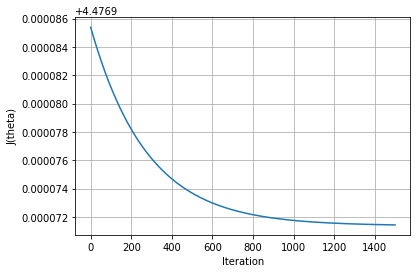

In [205]:
# Plot this gradient descent
i = np.arange(0, iterations, 1)

fig, ax = plt.subplots()
ax.plot(i, J_history)

ax.set(xlabel='Iteration', ylabel='J(theta)')
ax.grid()

plt.show()